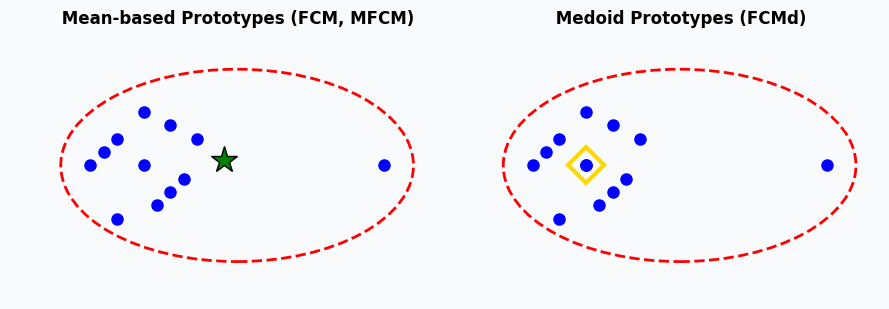

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# ---- Fixed data replicating the reference figure ----
points = np.array([
    [0.0, 0.0], [0.2, 0.1], [0.1, -0.1], [0.0, 0.2],
    [-0.1, 0.1], [-0.2, 0.0], [-0.1, -0.2], [0.15, -0.05],
    [0.1, 0.15], [-0.15, 0.05], [0.05, -0.15],
    [0.9, 0.0]   # clear outlier
])

# Cluster representatives
cluster_mean = [0.30, 0.02]     # slightly pulled toward the outlier
cluster_medoid = [0.0, 0.0]     # one of the real data points

# Calculate the bounding box for all points to define the ellipse
min_x, max_x = points[:, 0].min(), points[:, 0].max()
min_y, max_y = points[:, 1].min(), points[:, 1].max()

# Determine ellipse center and radii, adding a small margin
center_x = (min_x + max_x) / 2
center_y = (min_y + max_y) / 2
width = (max_x - min_x) * 1.2 # Add 20% margin
height = (max_y - min_y) * 1.8 # Add 80% margin for visual appeal and to be sure

# Figure and layout
fig, axs = plt.subplots(1, 2, figsize=(9, 4))
fig.patch.set_facecolor('#F8FAFC')
for ax in axs:
    ax.set_xlim(-0.5, 1.1)
    ax.set_ylim(-0.5, 0.5)
    ax.set_aspect('equal')
    ax.axis('off')

# ===== Left: K-Means =====
ax = axs[0]
for p in points:
    ax.plot(p[0], p[1], 'o', color='blue', markersize=8)
ax.plot(cluster_mean[0], cluster_mean[1], marker='*', color='green',
        markersize=20, markeredgecolor='black')
# Add ellipse instead of circle
ellipse_kmeans = plt.matplotlib.patches.Ellipse(
    (center_x, center_y), width, height,
    edgecolor='red', fc='None', ls='--', lw=2
)
ax.add_patch(ellipse_kmeans)
ax.set_title("     Mean-based Prototypes (FCM, MFCM)", fontsize=12, fontweight='bold')

# ===== Right: K-Medoids =====
ax = axs[1]
for p in points:
    ax.plot(p[0], p[1], 'o', color='blue', markersize=8)
ax.plot(cluster_medoid[0], cluster_medoid[1], 'o', color='blue', markersize=8)
ax.plot(cluster_medoid[0], cluster_medoid[1], marker='D', color='gold',
        markersize=18, markerfacecolor='none', markeredgewidth=3)
# Add ellipse instead of circle
ellipse_kmedoids = plt.matplotlib.patches.Ellipse(
    (center_x, center_y), width, height,
    edgecolor='red', fc='None', ls='--', lw=2
)
ax.add_patch(ellipse_kmedoids)
ax.set_title("     Medoid Prototypes (FCMd)", fontsize=12, fontweight='bold')

# ===== Legend =====
legend_elements = [
    plt.Line2D([], [], marker='o', color='blue', linestyle='', markersize=8, label='Data Point'),
    plt.Line2D([], [], marker='*', color='green', linestyle='', markersize=14, label='Cluster Mean'),
    plt.Line2D([], [], marker='D', color='gold', markerfacecolor='none',
               markeredgewidth=2.5, linestyle='', markersize=12, label='Cluster Medoid')
]

plt.tight_layout(rect=[0, 0, 1, 0.9])

plt.savefig("plot1ga.png", dpi=1200, bbox_inches='tight', facecolor=fig.get_facecolor())
plt.show()

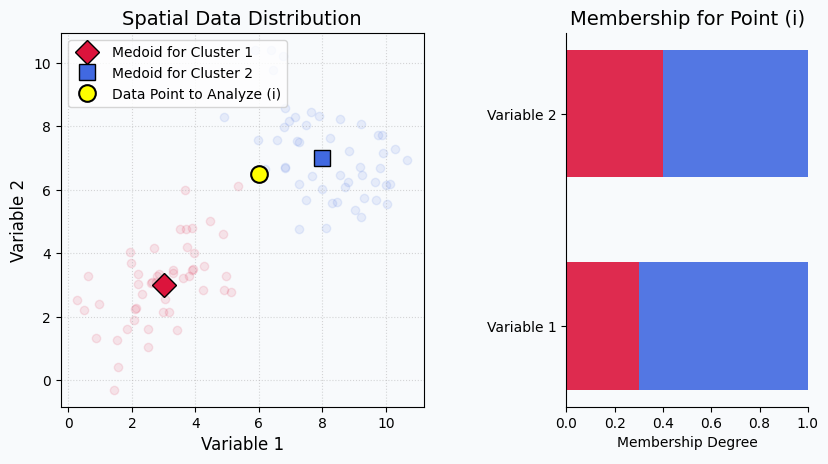

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Setup Data (Same as before) ---
medoid1 = np.array([3, 3])
medoid2 = np.array([8, 7])
point_of_interest = np.array([6, 6.5])

membership_values = {
    'cluster1': {'var1': 0.3, 'var2': 0.4},
    'cluster2': {'var1': 0.7, 'var2': 0.6}
}

np.random.seed(0)
cluster1_points = np.random.multivariate_normal(medoid1, [[1.5, 0.8], [0.8, 1.5]], size=50)
cluster2_points = np.random.multivariate_normal(medoid2, [[1.8, -0.9], [-0.9, 1.8]], size=50)

# --- 2. Create Figure with Two Side-by-Side Subplots ---
# Note the wide figsize (width, height)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5), gridspec_kw={'width_ratios': [2, 1]})
fig.patch.set_facecolor('#F8FAFC')

# --- 3. Left Subplot (ax1): The Scatter Plot ---
ax1.scatter(cluster1_points[:, 0], cluster1_points[:, 1], alpha=0.1, color='crimson')
ax1.scatter(cluster2_points[:, 0], cluster2_points[:, 1], alpha=0.1, color='royalblue')

ax1.plot(medoid1[0], medoid1[1], 'D', ms=12, color='crimson', mec='k', label='Medoid for Cluster 1')
ax1.plot(medoid2[0], medoid2[1], 's', ms=12, color='royalblue', mec='k', label='Medoid for Cluster 2')
ax1.plot(point_of_interest[0], point_of_interest[1], 'o', ms=12, mfc='yellow', mec='k', mew=1.5, label='Data Point to Analyze (i)')

ax1.set_xlabel('Variable 1', fontsize=12)
ax1.set_ylabel('Variable 2', fontsize=12)
ax1.legend(loc='upper left')
ax1.grid(True, linestyle=':', alpha=0.5)
ax1.set_aspect('equal', adjustable='box')
ax1.set_title('Spatial Data Distribution', fontsize=14)
ax1.set_facecolor('#F8FAFC')

# --- 4. Right Subplot (ax2): Membership Breakdown Bar Chart ---
labels = ['Variable 1', 'Variable 2']
c1_vals = [membership_values['cluster1']['var1'], membership_values['cluster1']['var2']]
c2_vals = [membership_values['cluster2']['var1'], membership_values['cluster2']['var2']]
y = np.arange(len(labels))

# Create the stacked bars on the second subplot
ax2.barh(y, c1_vals, label='Membership in Cluster 1', color='crimson', alpha=0.9, height=0.6)
ax2.barh(y, c2_vals, left=c1_vals, label='Membership in Cluster 2', color='royalblue', alpha=0.9, height=0.6)

# Formatting the bar chart
ax2.set_xlabel('Membership Degree')
ax2.set_title('Membership for Point (i)', fontsize=14)
ax2.set_yticks(y)
ax2.set_yticklabels(labels)
ax2.set_xlim(0, 1)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_facecolor('#F8FAFC')
#ax2.legend(loc='lower center', bbox_to_anchor=(0.5, -0.32), ncol=1)

# --- 5. Final Touches ---
plt.tight_layout(pad=2.0)
plt.savefig("plot2ga.png", dpi=1200, bbox_inches='tight', facecolor=fig.get_facecolor())
plt.show()

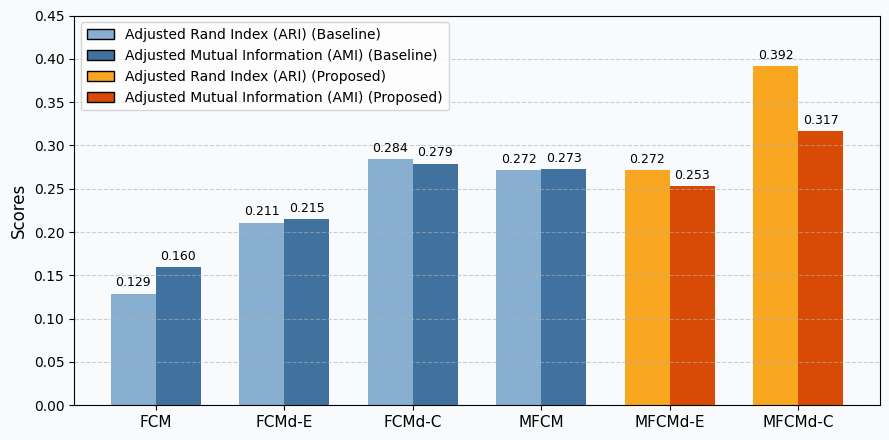

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Data Setup ---
algorithms = ['FCM', 'FCMd-E', 'FCMd-C', 'MFCM', 'MFCMd-E', 'MFCMd-C']
ari_scores = [0.129, 0.211, 0.284, 0.272, 0.272, 0.392]
ami_scores = [0.160, 0.215, 0.279, 0.273, 0.253, 0.317]

# --- 2. Color Scheme ---
# Standard colors for baseline methods
baseline_colors = ['#88AED0', '#41729F'] 
# Highlight colors for proposed methods
proposed_colors = ['#F9A620', '#D84A05'] 

colors_ari = [baseline_colors[0]] * 4 + [proposed_colors[0]] * 2
colors_ami = [baseline_colors[1]] * 4 + [proposed_colors[1]] * 2

# --- 3. Plotting ---
x = np.arange(len(algorithms))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(9, 4.5))
fig.patch.set_facecolor('#F8FAFC')

# Create the bars
rects1 = ax.bar(x - width/2, ari_scores, width, label='ARI', color=colors_ari)
rects2 = ax.bar(x + width/2, ami_scores, width, label='AMI', color=colors_ami)

# --- 4. Formatting and Labels ---
ax.set_ylabel('Scores', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(algorithms, rotation=0, fontsize=11)
ax.set_ylim(0, 0.45) # Set Y-axis limit to give space for labels
ax.patch.set_facecolor('#F8FAFC')

# Custom legend to show what the highlight means
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=baseline_colors[0], edgecolor='k', label='Adjusted Rand Index (ARI) (Baseline)'),
    Patch(facecolor=baseline_colors[1], edgecolor='k', label='Adjusted Mutual Information (AMI) (Baseline)'),
    Patch(facecolor=proposed_colors[0], edgecolor='k', label='Adjusted Rand Index (ARI) (Proposed)'),
    Patch(facecolor=proposed_colors[1], edgecolor='k', label='Adjusted Mutual Information (AMI) (Proposed)')
]
ax.legend(handles=legend_elements, loc='upper left')

# Add data labels on top of bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=9)

add_labels(rects1)
add_labels(rects2)

ax.grid(axis='y', linestyle='--', alpha=0.6)
fig.tight_layout()

plt.savefig("plot3ga.png", dpi=1200, bbox_inches='tight', facecolor=fig.get_facecolor())
plt.show()

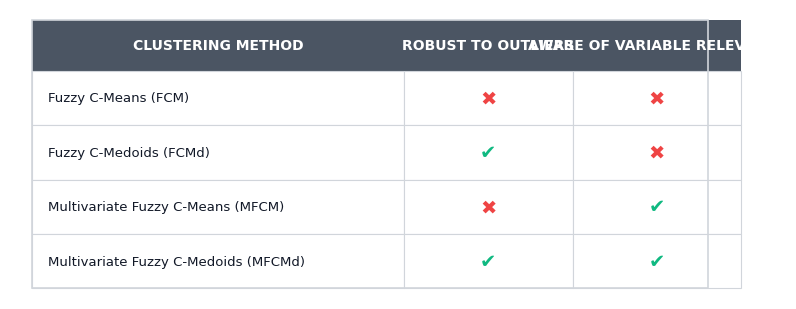

In [3]:
import matplotlib.pyplot as plt

# ---- Data ----
methods = [
    "Fuzzy C-Means (FCM)",
    "Fuzzy C-Medoids (FCMd)",
    "Multivariate Fuzzy C-Means (MFCM)",
    "Multivariate Fuzzy C-Medoids (MFCMd)"
]
robust = [False, True, False, True]
aware_var = [False, False, True, True]

# ---- Style ----
header_bg = "#4B5563"
header_text = "#FFFFFF"
cell_bg = "#FFFFFF"
grid_color = "#D1D5DB"
text_color = "#111827"
check_color = "#10B981"
cross_color = "#EF4444"

plt.rcParams['font.family'] = 'DejaVu Sans'

# ---- Layout ----
n_rows, n_cols = len(methods), 3
fig, ax = plt.subplots(figsize=(7.5, 3.2))
ax.set_axis_off()

# Column relative widths (more space for headers)
col_widths = [0.55, 0.25, 0.25]
left, bottom = 0.05, 0.08
total_width, total_height = 0.9, 0.84
header_height = 0.16
row_height = (total_height - header_height) / n_rows

# ---- Header ----
headers = ["CLUSTERING METHOD", "ROBUST TO OUTLIERS", "AWARE OF VARIABLE RELEVANCE"]
x = left
y_top = bottom + total_height
for i, w in enumerate(col_widths):
    rect = plt.Rectangle((x, y_top - header_height), total_width * w, header_height,
                         facecolor=header_bg, edgecolor="none", transform=fig.transFigure)
    fig.patches.append(rect)
    cx = x + total_width * w / 2
    cy = y_top - header_height / 2
    fig.text(cx, cy, headers[i], ha="center", va="center", color=header_text,
             fontsize=10, fontweight="bold", transform=fig.transFigure)
    x += total_width * w

# ---- Rows ----
for r, method in enumerate(methods):
    y = bottom + (n_rows - 1 - r) * row_height

    # row background
    for c, w in enumerate(col_widths):
        rect = plt.Rectangle((left + total_width * sum(col_widths[:c]), y),
                             total_width * w, row_height,
                             facecolor=cell_bg, edgecolor=grid_color, linewidth=0.8,
                             transform=fig.transFigure)
        fig.patches.append(rect)

    # text for method name
    cx = left + 0.02
    cy = y + row_height / 2
    fig.text(cx, cy, method, ha="left", va="center", color=text_color,
             fontsize=9.5, transform=fig.transFigure)

    # robust cell
    cx_r = left + total_width * (col_widths[0] + col_widths[1] / 2)
    symbol_r = "✔" if robust[r] else "✖"
    color_r = check_color if robust[r] else cross_color
    fig.text(cx_r, cy, symbol_r, ha="center", va="center", color=color_r,
             fontsize=14, transform=fig.transFigure)

    # aware variable cell
    cx_a = left + total_width * (col_widths[0] + col_widths[1] + col_widths[2] / 2)
    symbol_a = "✔" if aware_var[r] else "✖"
    color_a = check_color if aware_var[r] else cross_color
    fig.text(cx_a, cy, symbol_a, ha="center", va="center", color=color_a,
             fontsize=14, transform=fig.transFigure)

# ---- Outer border ----
outer = plt.Rectangle((left, bottom), total_width, total_height,
                      fill=False, edgecolor=grid_color, linewidth=1.2,
                      transform=fig.transFigure)
fig.patches.append(outer)

plt.tight_layout()

# ---- Save high-quality versions ----
plt.savefig("method_table_clean.png", dpi=600, bbox_inches="tight", pad_inches=0.02)
plt.savefig("method_table_clean.svg", bbox_inches="tight", pad_inches=0.02)
plt.show()
